In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

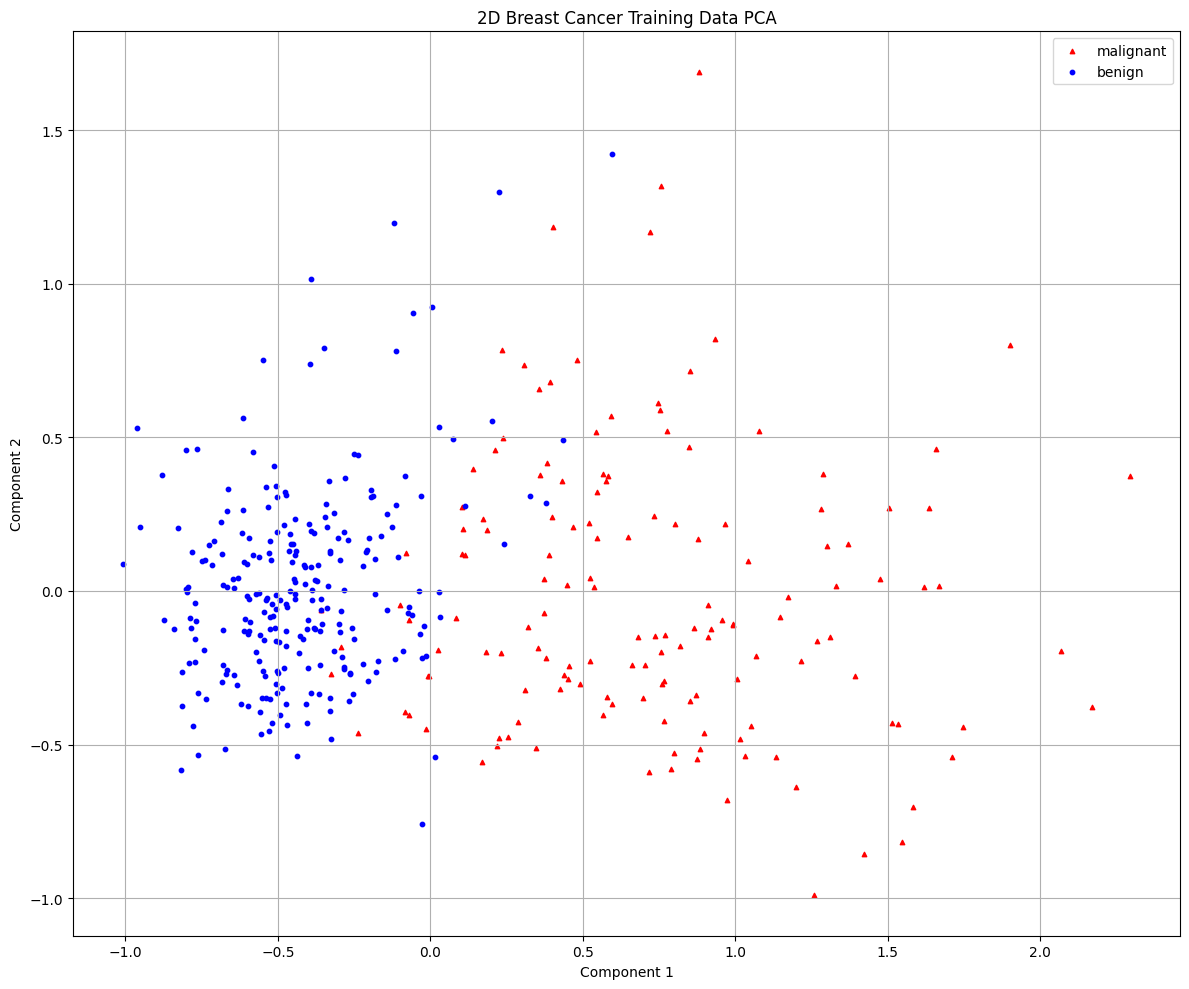

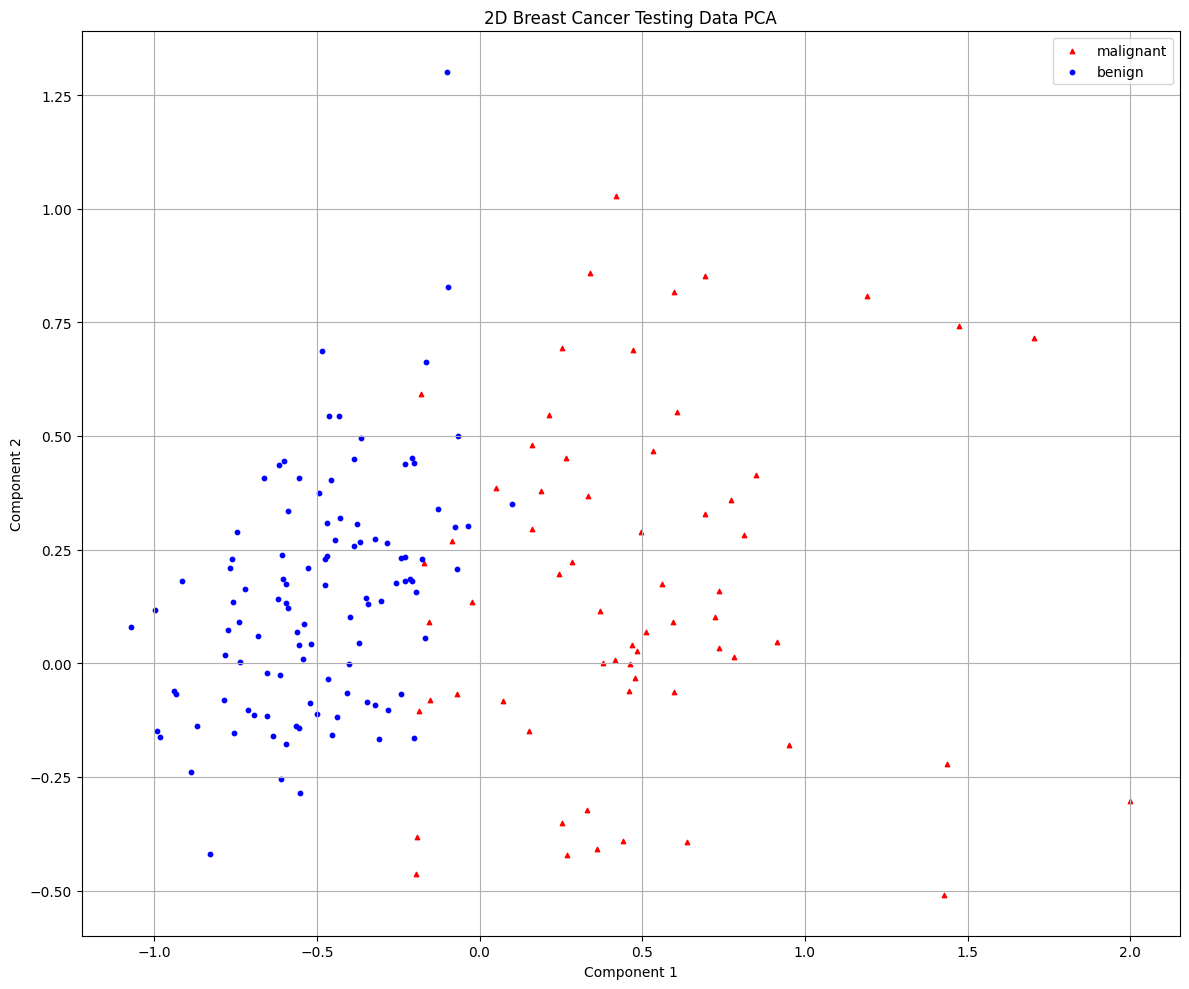

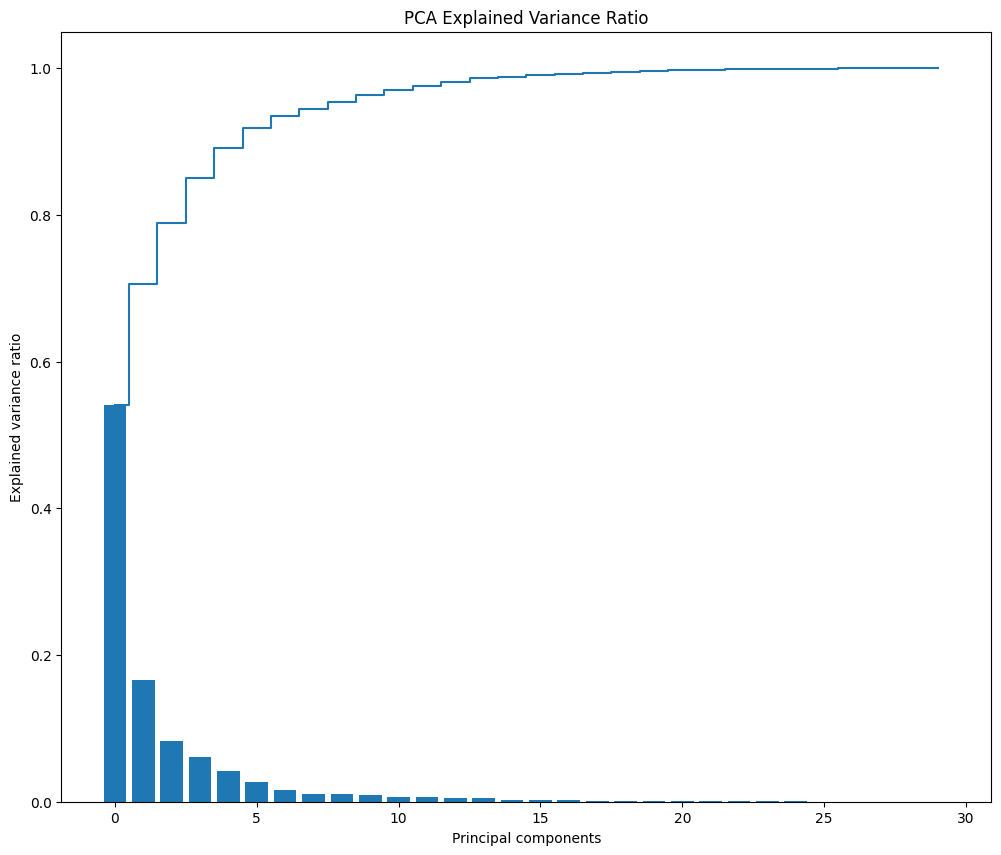

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})

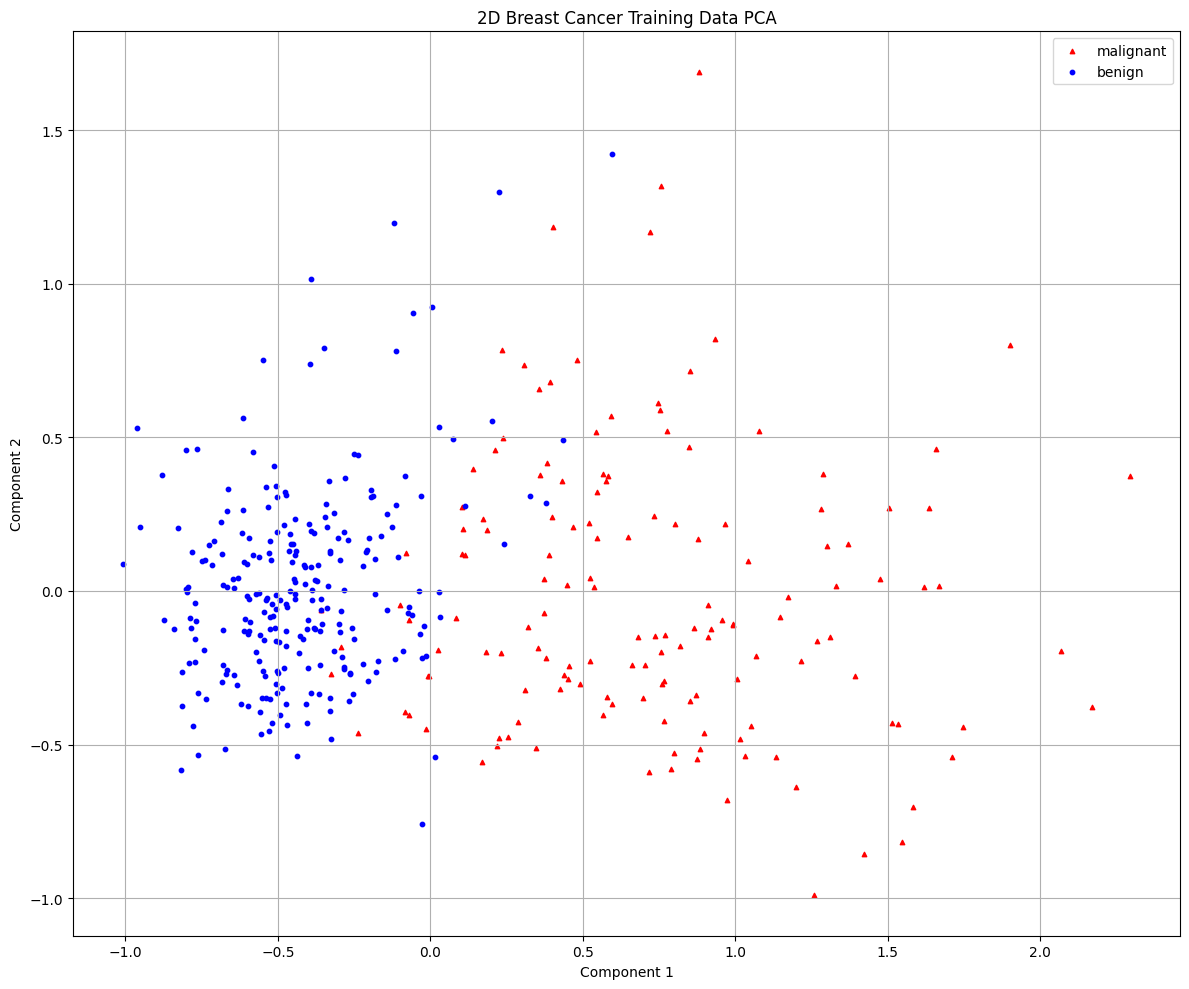

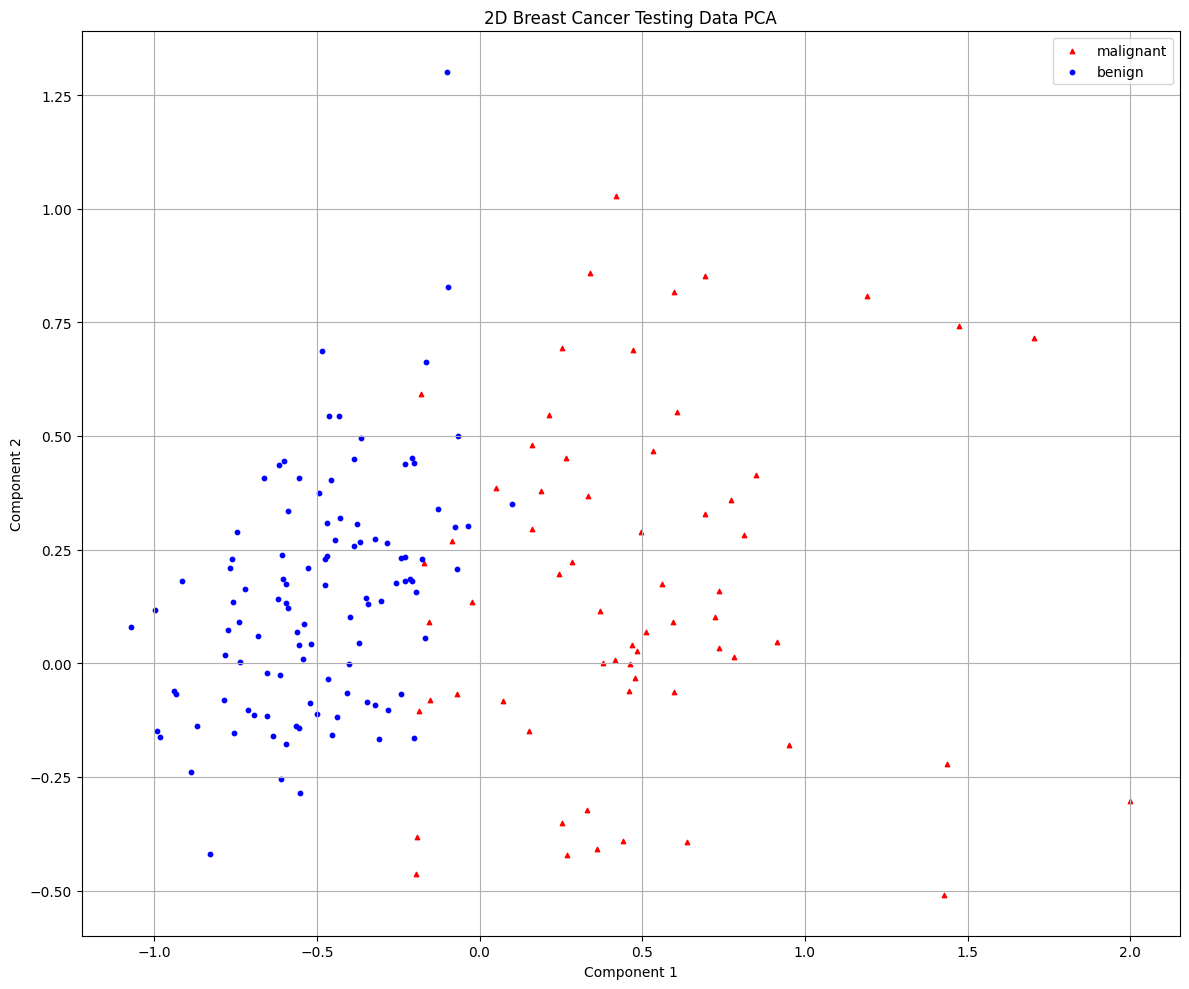

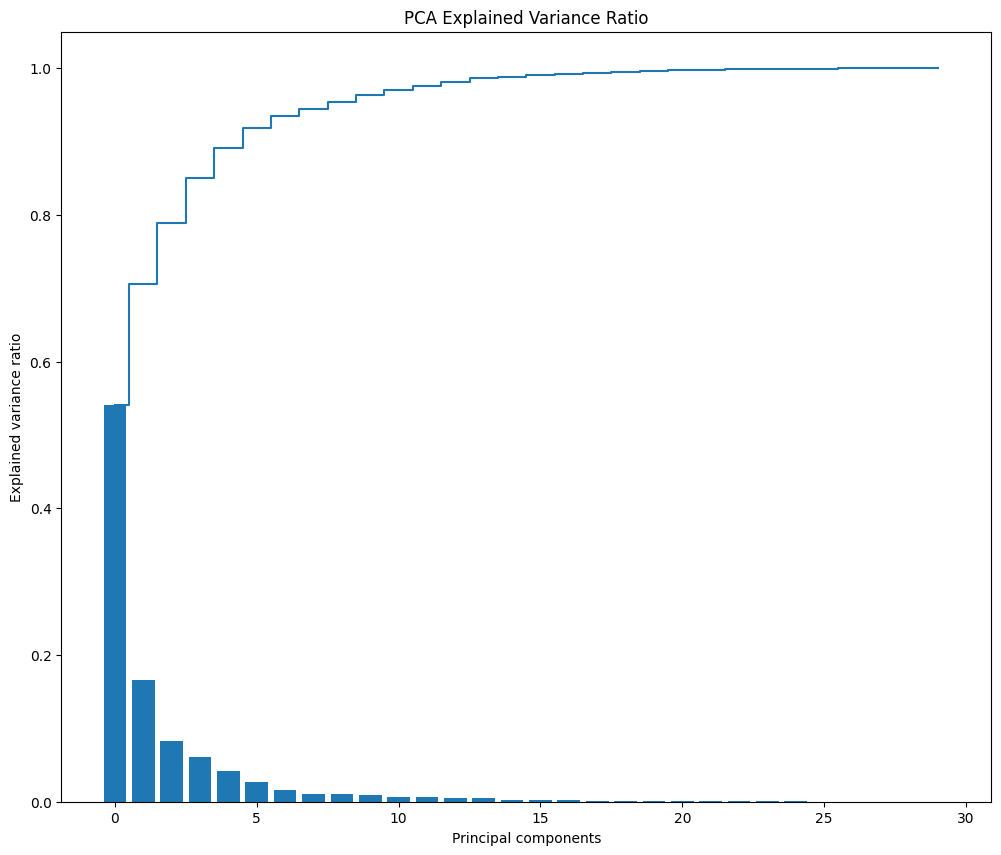

[I 2025-04-27 10:42:24,117] A new study created in memory with name: no-name-e3f52bf4-b59c-4f6e-b35a-233d766b5f26
[I 2025-04-27 10:42:25,733] Trial 0 finished with value: 0.937246835443038 and parameters: {'n_estimators': 360, 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.937246835443038.
[I 2025-04-27 10:42:28,772] Trial 1 finished with value: 0.9447151898734176 and parameters: {'n_estimators': 785, 'max_depth': 12, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9447151898734176.
[I 2025-04-27 10:42:32,576] Trial 2 finished with value: 0.9473101265822784 and parameters: {'n_estimators': 975, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 19}. Best is trial 2 with value: 0.9473101265822784.
[I 2025-04-27 10:42:35,596] Trial 3 finished with value: 0.9447784810126582 and parameters: {'n_estimators': 647, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 11}. Best is trial 2 with value

Best trial:
Accuracy: 0.9497468354430378
Best hyperparameters:  {'n_estimators': 324, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 2}


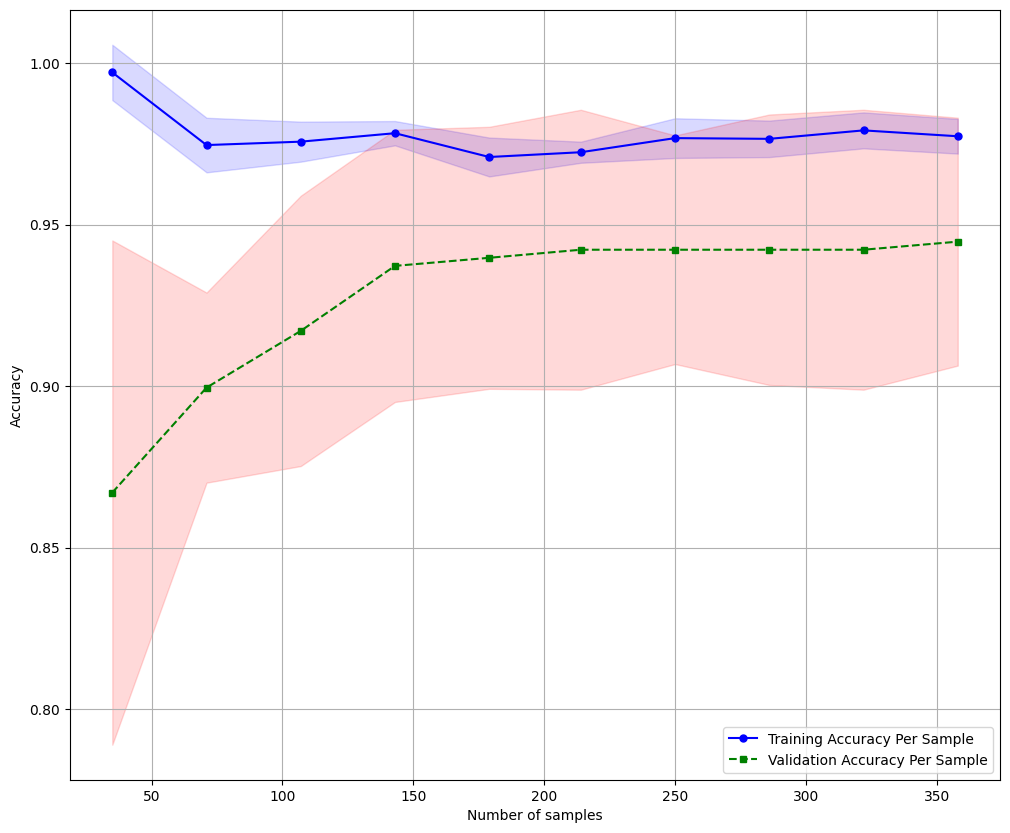

Confusion Matrix
[[ 55   9]
 [  2 105]]
Accuracy: 0.9357, Precision: 0.9211, Recall: 0.9813, F1: 0.9502, AUC: 0.9890


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})
helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)